# Global Terrorism Database

## Loading the Data

In [7]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# columns of interest
cols_to_extract = ['eventid','imonth', 'iyear','iday',
 'country_txt','region_txt','provstate','city','latitude','longitude',
 'crit1','crit2','crit3',
 'attacktype1_txt',
 'success','suicide',
 'weaptype1_txt',
 'targtype1_txt',
 'gname',
 'individual','nperps','nperpcap',
 'claimed',
 'nkill','nkillter','nwound','nwoundte',
 'property','propextent_txt',
 'ishostkid','nhostkid','nhours','ndays','kidhijcountry',
 'ransom','ransomamt','ransompaid','hostkidoutcome_txt','nreleased']

# Load data
df = pd.read_excel('GTD_0617dist/globalterrorismdb_0617dist.xlsx',
                   usecols=cols_to_extract,
                   na_values = ['Unknown','-99','-9','Not Applicable'])

# replace some values not correctly dealt with by pandas import
df.replace(-9,np.nan,inplace=True)
df.replace(-99,np.nan,inplace=True)

# entries without month or day - treat as 1st January
df['imonth'].replace(0,1,inplace=True)
df['iday'].replace(0,1,inplace=True)

# create a date column, then get rid of the seaparte year, month and day columns
df['iyear']=pd.to_datetime(dict(year=df.iyear, month=df.imonth, day=df.iday)) 
df.rename(columns={'iyear':'date'}, inplace=True)
df.drop(['imonth','iday'],axis=1,inplace=True)

# set date as the index
df.set_index('date',inplace=True)
print('Done!')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 170350 entries, 1970-07-02 to 2016-12-30
Data columns (total 36 columns):
eventid               170350 non-null int64
country_txt           170350 non-null object
region_txt            170350 non-null object
provstate             152649 non-null object
city                  160742 non-null object
latitude              165743 non-null float64
longitude             165744 non-null float64
crit1                 170350 non-null int64
crit2                 170350 non-null int64
crit3                 170350 non-null int64
success               170350 non-null int64
suicide               170350 non-null int64
attacktype1_txt       163925 non-null object
targtype1_txt         165477 non-null object
gname                 92044 non-null object
individual            170350 non-null int64
nperps                26173 non-null float64
nperpcap              99205 non-null float64
claimed               102742 non-null float64
weaptype1_txt         1

## Look at the Structure of the Data

In [71]:
df.info()

# first 5 incidents in 2016
print('==============================')
print('FIRST 5 INCIDENTS IN 2016:')
print('==============================')
display(df['2016'].head(5))

# look at the most common values in each column
print('==============================')
print('TOP 2 VALUES IN EACH COLUMN:')
print('==============================')
top_vals = dict()
for column in df.columns:
    top_vals[column] = df[column].value_counts().index[:2]

top_vals = pd.DataFrame(top_vals).T
top_vals.index.name = 'column'
top_vals.columns = ['1st','2nd']
display(top_vals)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 170350 entries, 1970-07-02 to 2016-12-30
Data columns (total 36 columns):
eventid               170350 non-null int64
country_txt           170350 non-null object
region_txt            170350 non-null object
provstate             152649 non-null object
city                  160742 non-null object
latitude              165743 non-null float64
longitude             165744 non-null float64
crit1                 170350 non-null int64
crit2                 170350 non-null int64
crit3                 170350 non-null int64
success               170350 non-null int64
suicide               170350 non-null int64
attacktype1_txt       163925 non-null object
targtype1_txt         165477 non-null object
gname                 92044 non-null object
individual            170350 non-null int64
nperps                26173 non-null float64
nperpcap              99205 non-null float64
claimed               102742 non-null float64
weaptype1_txt         1

,eventid,country_txt,region_txt,provstate,city,latitude,longitude,crit1,crit2,crit3,...,ishostkid,nhostkid,nhours,ndays,kidhijcountry,ransom,ransomamt,ransompaid,hostkidoutcome_txt,nreleased
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,201601010003,Iraq,Middle East & North Africa,Baghdad,Baghdad,33.325091,44.422353,1,1,1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01,201601010004,Iraq,Middle East & North Africa,Baghdad,Baghdad,33.389934,44.460652,1,1,1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01,201601010005,Iraq,Middle East & North Africa,Baghdad,Baghdad,33.223512,44.434701,1,1,1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01,201601010008,India,South Asia,Punjab,Pathankot,32.268717,75.655513,1,1,1,...,1.0,3.0,NaN,NaN,NaN,0.0,NaN,NaN,Hostage(s) released by perpetrators,3.0
2016-01-01,201601010009,India,South Asia,Punjab,Kathlore,32.244186,75.434659,1,1,1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


TOP 2 VALUES IN EACH COLUMN:


,1st,2nd
column,,
attacktype1_txt,Bombing/Explosion,Armed Assault
city,Baghdad,Karachi
claimed,0,1
country_txt,Iraq,Pakistan
crit1,1,0
crit2,1,0
crit3,1,0
eventid,200711140022,201508080068
gname,Taliban,Shining Path (SL)


In [10]:
# check for duplicates, ignoring the eventid column
dups = df.drop('eventid',axis=1).duplicated(keep=False)
print('There are',dups.sum(),'rows that have duplicated information in other rows.')

# Some rows are identical to each other.
# E.g. 100 duplicates of GTD ID 201609210029. In this case seems to be
# 100 separte incidents of an explosive being detonated in a civilian
# house. So I will treat the duplicates as genuine.

There are 29616 rows that have duplicated information in other rows.


## No. of Incidents and Casualties per Year

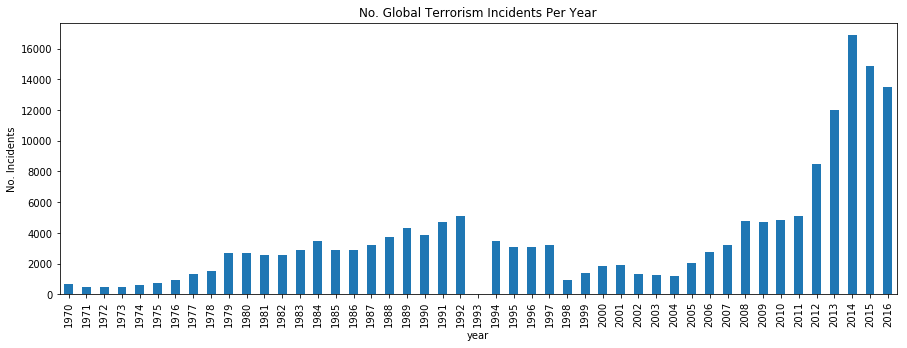

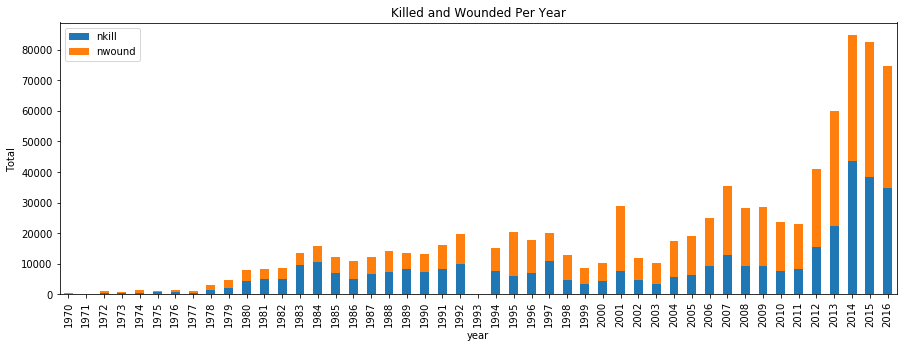

In [11]:
# total incidents per year
tot_inc_yr = df.resample('A')['eventid'].count()
tot_inc_yr.index = tot_inc_yr.index.year
tot_inc_yr.name = 'n_incidents'
tot_inc_yr.index.name = 'year'
plt.figure(figsize=(15,5))
tot_inc_yr.plot.bar(title='No. Global Terrorism Incidents Per Year')
plt.ylabel('No. Incidents');

# total deaths and wounded per year
tot_kill_yr = df.resample('A')[['nkill','nwound']].sum()
tot_kill_yr.name = 'killed_wounded'
tot_kill_yr.index = tot_kill_yr.index.year
tot_kill_yr.index.name = 'year'

ax=plt.figure(figsize=(15,5)).gca()
tot_kill_yr.plot(kind='bar',stacked=True,ax=ax,title='Killed and Wounded Per Year')
plt.legend();
plt.ylabel('Total');

## Countries and Regions with the Most Incidents

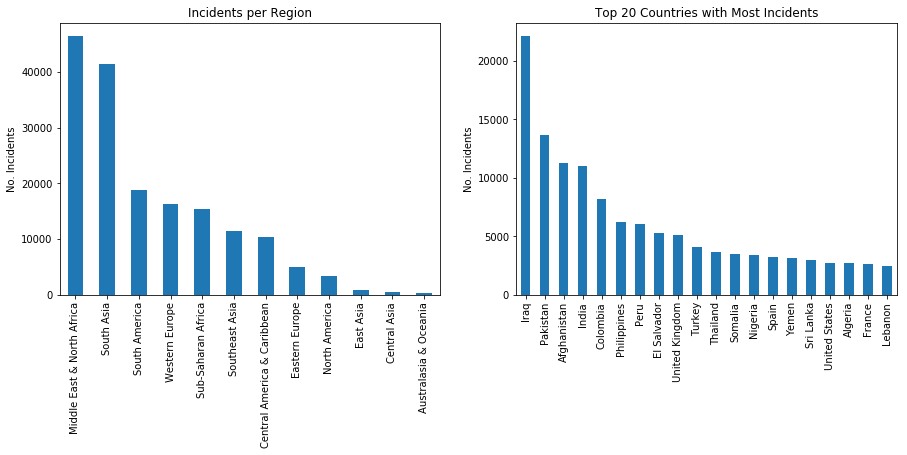

In [73]:
# No. of incidents per region
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['region_txt'].value_counts().plot.bar(title='Incidents per Region')
plt.ylabel('No. Incidents')

plt.subplot(1,2,2)
df['country_txt'].value_counts()[:20].plot.bar(title='Top 20 Countries with Most Incidents')
plt.ylabel('No. Incidents');

## Most Active Groups

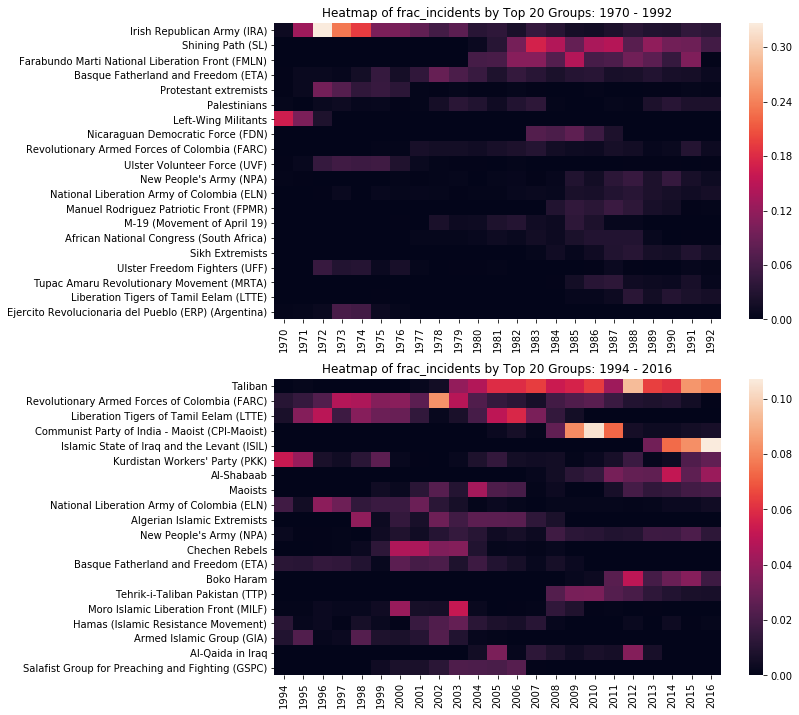

In [28]:
# incidents per year per group
grp_inc_yr = df.groupby([pd.Grouper(freq='A'),'gname'])['country_txt'].count()
grp_inc_yr = grp_inc_yr.unstack('gname',fill_value=0)
grp_inc_yr.name = 'n_incidents'
grp_inc_yr.index = grp_inc_yr.index.year
grp_inc_yr.index.name = 'year'

# fraction incidents per year
grp_frinc_yr = grp_inc_yr.div(tot_inc_yr,axis='rows')
grp_frinc_yr.name = 'frac_incidents'

# heatmap plot function
def plot_heatmap(data,year_range,n_groups=20):
    plot_groups = data.loc[year_range].sum().sort_values(ascending=False)[:n_groups].index
    sns.heatmap(data[plot_groups].loc[year_range].T)
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Heatmap of {} by Top {} Groups: {} - {}'.format(data.name,n_groups,min(year_range),max(year_range)))

plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
plot_heatmap(grp_frinc_yr,list(np.arange(1970,1993)))
plt.subplot(2,1,2)
plot_heatmap(grp_frinc_yr,list(np.arange(1994,2017)))

## Attack Type

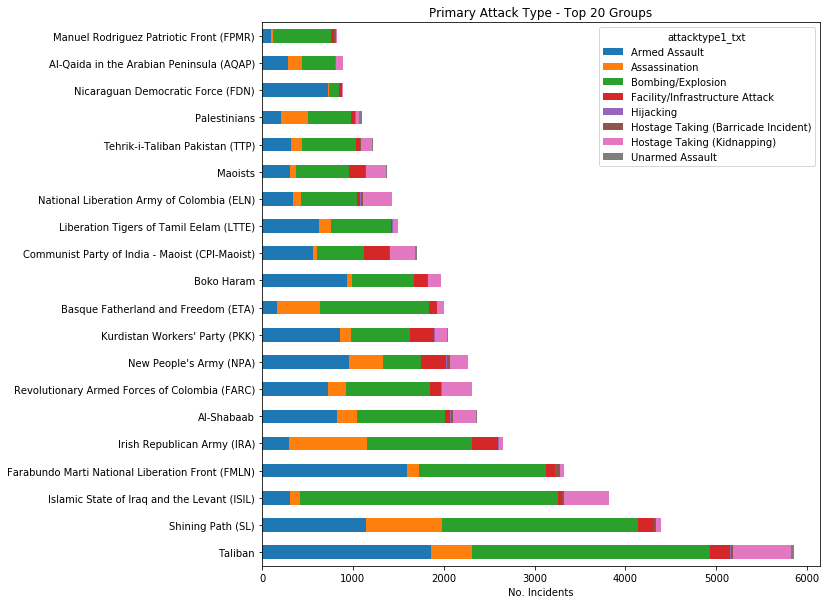

In [16]:
# no. attacks of each type by group
grp_att=df.groupby('gname')['attacktype1_txt'].value_counts().unstack('attacktype1_txt',fill_value=0)
grp_att['tot_inc'] = grp_att.sum(axis=1)
grp_att.sort_values(by='tot_inc',ascending=False,inplace=True)

ax = plt.figure(figsize=(10,10)).gca()
grp_att.drop('tot_inc',axis=1).head(20)\
       .plot(kind='barh',stacked=True,ax=ax)
plt.title('Primary Attack Type - Top 20 Groups')
plt.ylabel('');
plt.xlabel('No. Incidents');

## Attack Locations for Most Active Groups

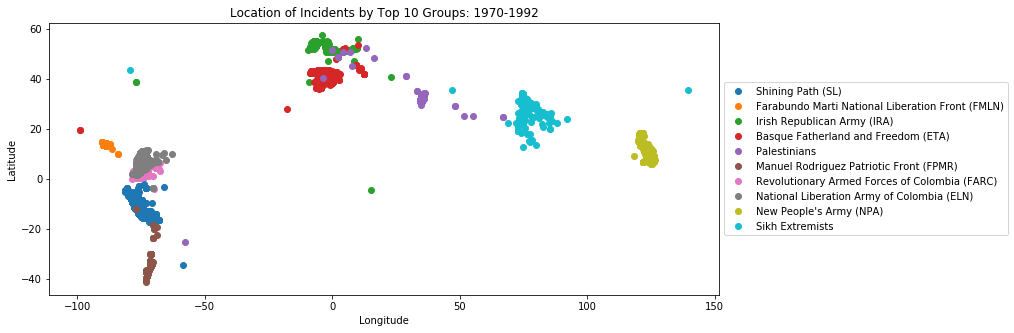

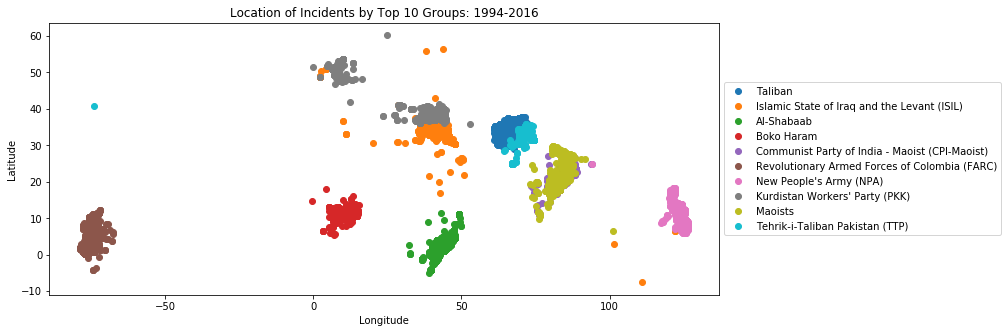

In [40]:
def plot_lonlat(start,stop,n_groups=10):
    '''Plot longitude and latitude for top n_groups
       between the years start and stop'''
    
    # extract years of interest
    incs = df[start:stop][['gname','longitude','latitude']].dropna()
    # find top n_groups for this period
    top_grps = incs['gname'].value_counts().head(n_groups).index
    
    # make figure, get axes
    ax=plt.figure(figsize=(15,5)).gca()

    for grp in top_grps:
        grp_incs = incs[incs['gname']==grp]
        plt.plot(grp_incs['longitude'],grp_incs['latitude'],marker='o', linestyle='', label=grp)
    
    # Put legend outside plot, from:
    # https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
    plt.title('Location of Incidents by Top {} Groups: {}-{}'.format(n_groups,start,stop))
    plt.xlabel('Longitude')
    plt.ylabel('Latitude');
    
plot_lonlat('1970','1992')
plot_lonlat('1994','2016')